In [66]:
import pandas as pd
from utils.PVPredictor import *
from utils.Utility import *

test_data = pd.read_csv('../Data/electricity/test.csv')
weather_data =pd.read_csv('../Data/weather/test_weather.csv')
test_data.head(5)

,DateTime,grid,solar
0,2019-11-01 00:00:00,0.457,0.000
1,2019-11-01 00:15:00,0.350,-0.001
2,2019-11-01 00:30:00,0.399,-0.001
3,2019-11-01 00:45:00,0.337,-0.001
4,2019-11-01 01:00:00,0.433,0.000


In [1]:
class Utility:

    def __init__(self):
        self.UNIT_PRICING = [5.,5.,5.,5.,5.,5.,15.,15.,15.,15.,15.,15.,15.,15.,15.,15.,25.,25.,25.,25.,25.,25.,25.,25.]

    def pricing(self, hour, rate, ign=True):
        if ign == True:
            if rate < 0:
                return 0
        hour = int(hour)
        return rate * self.UNIT_PRICING[hour] / 4

def grid_limit_check(amount, limit):
    # return 'PV to grid', 'reduce PV'
    if amount > limit:
        return limit, amount-limit
    return amount, 0

In [3]:
# Utility object
utility = Utility()
pv_model = PVPredictor()

total_elec_records = []
total = 0
date = ''
for index, row in test_data.iterrows():
    if date != row['DateTime'].split(' ')[0]:
        total_elec_records.append(total)
        total = 0
    date, time = row['DateTime'].split(' ')
    hour, _, _ = time.split(':')
    total += utility.pricing(hour, row['grid'])
total_elec_records = total_elec_records[1:]

print(total_elec_records)

[130.81875000000002, 127.45125, 185.80125000000004, 172.47875, 367.13500000000005, 262.02875, 222.60375000000002, 214.18500000000003, 225.16750000000002, 302.745, 319.6812499999999, 371.45125, 372.90875000000005, 222.99874999999997, 263.00125]


In [4]:
weather_record = '../Data/weather/weather_record.csv'
electricity_record = '../Data/electricity/electricity_record.csv'

pv_predictor = PVPredictor()
pv_predictor.train(weather_record, electricity_record)


Finish preprocessing
weather record size:  (304, 10)
solar record size:  (304, 1)
Train X size:  (243, 10)
Train y size:  (243, 1)
Test X size:  (61, 10)
Test y size:  (61, 1)
Score:  0.6810919095809904
Finish training



/Users/Rycemond/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
BATTERYCONST = 50.
battery_vol = 0.

test_weather = pd.read_csv('../Data/weather/test_weather.csv')
test_weather = test_weather[['MaxTemperature', 'AvgTemperature', 'MinTemperature', 'MaxHumidity', 'AvgHumidity', 'MinHumidity', 'MaxWindspeed', 'AvgWindspeed', 'MinWindspeed', 'Precipitation']]
test_electricity = pd.read_csv('../Data/electricity/test.csv')

pv_pred = pv_predictor.predict(test_weather[:15])

test_electricity.head(5)

date = ''

for index, row in test_electricity.iterrow():
    


,DateTime,grid,solar
0,2019-11-01 00:00:00,0.457,0.000
1,2019-11-01 00:15:00,0.350,-0.001
2,2019-11-01 00:30:00,0.399,-0.001
3,2019-11-01 00:45:00,0.337,-0.001
4,2019-11-01 01:00:00,0.433,0.000


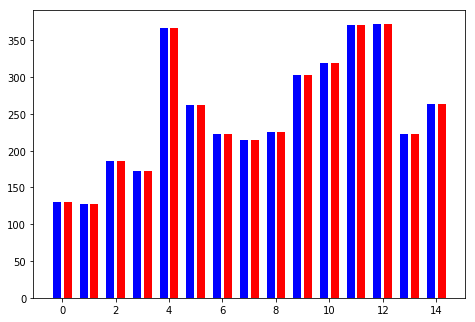

In [59]:
import matplotlib.pyplot as plt
import numpy as np

students1 = students[:]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(15)
langs = ['11/'+str(i+1) for i in range(15)]
students = total_elec_records
ax.bar(X-0.2, students, color='b', width=0.3)
ax.bar(X+0.2, students1, color='r', width=0.3)
plt.show()


In [ ]:
# estimate the amount of electricity require from grid on day d+1
def require_from_grid(demand_p, produce_p):
    require_p = demand_p - produce_p
    if require_p > 0:
        return require_p
    return 0  


demand_p = demand_predictor.predict([])
produces_p = pv_predictor.predict(test_weather[:15])
grids_p = []

for i in range(15):
    grids_p.append()
    

In [23]:
import pandas as pd
from utils.PVPredictor import *
from utils.Utility import *

test_data = pd.read_csv('../Data/electricity/test.csv')
test_data.head(96)

,DateTime,grid,solar
0,2019-11-01 00:00:00,0.457,0.000
1,2019-11-01 00:15:00,0.350,-0.001
2,2019-11-01 00:30:00,0.399,-0.001
3,2019-11-01 00:45:00,0.337,-0.001
4,2019-11-01 01:00:00,0.433,0.000
5,2019-11-01 01:15:00,0.440,0.000
6,2019-11-01 01:30:00,0.389,-0.001
7,2019-11-01 01:45:00,0.417,0.000
8,2019-11-01 02:00:00,0.379,-0.001
9,2019-11-01 02:15:00,0.356,-0.001


In [76]:
def pricing(grid):
    if grid > 0:
        return grid/4
    return 0

# combine total demand for a day
UNIT_PRICING = [5.,5.,5.,5.,5.,5.,15.,15.,15.,15.,15.,15.,15.,15.,15.,15.,25.,25.,25.,25.,25.,25.,25.,25.]
date = ''
total_d, total_c, total_s = 0, 0, 0
demand_from_grid = []
cost_from_grid = []
from_solar = []
for idx, row in test_data.iterrows():
    if date != row['DateTime'].split(' ')[0]:
        demand_from_grid.append(total_d)
        cost_from_grid.append(total_c)
        from_solar.append(total_s)
        total_d, total_c, total_s = 0, 0, 0
        date = row['DateTime'].split(' ')[0]
    
    if row['grid'] > 0:
        total_d += row['grid']
        total_c += pricing(row['grid']*UNIT_PRICING[int(row['DateTime'].split(' ')[1].split(':')[0])])  
    total_s += row['solar']
        
demand_from_grid.append(total_d)
cost_from_grid.append(total_c)
from_solar.append(total_s)
demand_from_grid = demand_from_grid[1:16]
cost_from_grid = cost_from_grid[1:16]
from_solar = from_solar[1:16]

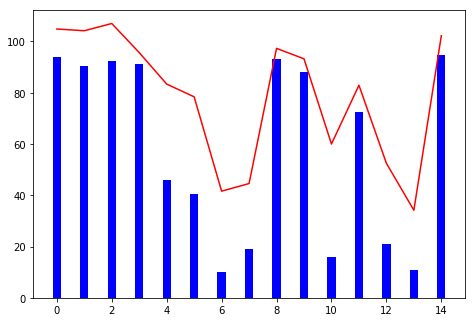

In [93]:
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(15)
langs = ['11/'+str(i+1) for i in range(15)]
ax.plot(pv_predict.reshape(-1,)[:15], color='r')
ax.bar(X, from_solar, color='b', width=0.3)
plt.show()

In [94]:
class DemandPredictor():
    
    def __init__(self):
        pass
    
    def predict(self, data):
        if 0 <= data['day'] <= 4:
            return 90.
        return 125.
    

In [72]:
pv_model = PVPredictor()
pv_model.train('../Data/weather/weather_record.csv', '../Data/electricity/electricity_record.csv')



Finish preprocessing
weather record size:  (304, 10)
solar record size:  (304, 1)
Train X size:  (243, 10)
Train y size:  (243, 1)
Test X size:  (61, 10)
Test y size:  (61, 1)
Score:  0.7776872625163148
Finish training



/Users/Rycemond/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [85]:
test_weather = weather_data[['MaxTemperature', 'AvgTemperature', 'MinTemperature', 'MaxHumidity', 'AvgHumidity', 'MinHumidity', 'MaxWindspeed', 'AvgWindspeed', 'MinWindspeed', 'Precipitation']]
pv_predict = pv_model.predict(test_weather)
pv_predict.reshape(-1,)

array([104.83166627, 104.15136319, 106.96809673,  95.62728575,
        83.35137936,  78.36704503,  41.58858315,  44.55897933,
        97.27439378,  93.2026408 ,  59.97219289,  82.89265787,
        52.46556466,  34.14507718, 102.19825883,  94.56211166,
        71.41182781,  49.06050877])

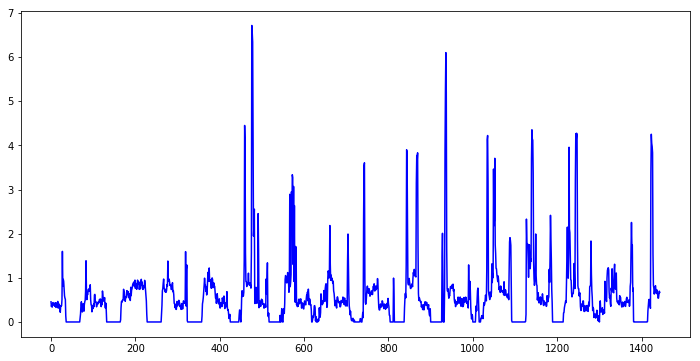

In [44]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot([g if g>=0 else 0 for g in test_data['grid']], color='b', label='grid')
#plt.plot(test_data['solar'], color='r', label='solar')
plt.show()